# Introduction to Python Project : FoodHub Data Analysis

### Problem Statement

<b> Write the problem statement and objectives here </b>  


The food aggregator company has stored the data of the different orders made by the registered customers in their online portal. They want to analyze the data to get a fair idea about the demand of different restaurants which will help them in enhancing their customer experience.Perform the data analysis to find answers to these questions that will help the company improve its business. 




### Data Dictionary

order_id: Unique ID of the order <br>
customer_id: ID of the customer who ordered the food <br>
restaurant_name: Name of the restaurant <br>
cuisine_type: Cuisine ordered by the customer<br>
cost_of_the_order: Price paid per order<br>
day_of_the_week: Indicates whether the order is placed on a weekday or weekend (The weekday is from Monday to Friday and the weekend is Saturday and Sunday) <br>
rating: Rating given by the customer out of 5 <br>
food_preparation_time: Time (in minutes) taken by the restaurant to prepare the food. This is calculated by taking the difference between the timestamps of the restaurant's order confirmation and the delivery person's pick-up confirmation.<br>
delivery_time: Time (in minutes) taken by the delivery person to deliver the food package. This is calculated by taking the difference between the timestamps of the delivery person's pick-up confirmation and drop-off  <br>

### Let us start by importing the required libraries

In [1]:
# Write your code here to import necessary libraries for the project
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

%matplotlib inline

### Understanding the structure of the data

In [2]:
# uncomment and run the following lines for Google Colab
# from google.colab import drive
# drive.mount('/content/drive')



In [3]:
# Write your code here to read the data
data = pd.read_csv('foodhub_order.csv')

In [4]:
# Write your code here to view the first 5 rows
data.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24


### **Question 1:** How many rows and columns are present in the data? [0.5 mark]

In [5]:
# Write your code here
data.shape

(1898, 9)

#### Observations:

There are 1898 rows and 9 columns in the dataset


### **Question 2:** What are the datatypes of the different columns in the dataset? (The info() function can be used) [0.5 mark]

In [6]:
# Write your code here
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   object 
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 133.6+ KB


#### Observations:

The columns having datatype as Object are 'restuarant_name','cuisine_type','day_of_the_week','rating'<br>
The columns having datatype as Int64 are 'order_id','customer_id','food_preparation_time','delivery_time'<br>
The columns having datatype as Float64 are 'cost_of_the_order'<br>
All the columns have no null values


### **Question 3:** Are there any missing values in the data? If yes, treat them using an appropriate method. [1 mark]

In [7]:
# Write your code here

data.isna().sum()

order_id                 0
customer_id              0
restaurant_name          0
cuisine_type             0
cost_of_the_order        0
day_of_the_week          0
rating                   0
food_preparation_time    0
delivery_time            0
dtype: int64

In [8]:
data['rating'].value_counts()

Not given    736
5            588
4            386
3            188
Name: rating, dtype: int64

#### Observations:


- There are no null values in the original dataset.
- However, the rating column contains 736 occurrences of 'Not Given' values which are rating not given by the user which can be considered at NULL values in the dataset.

### **Question 4:** Check the statistical summary of the data. What is the minimum, average, and maximum time it takes for food to be prepared once an order is placed? [2 marks]

In [9]:
# Write your code here
print (data.describe(include='all'))

            order_id    customer_id restaurant_name cuisine_type  \
count   1.898000e+03    1898.000000            1898         1898   
unique           NaN            NaN             178           14   
top              NaN            NaN     Shake Shack     American   
freq             NaN            NaN             219          584   
mean    1.477496e+06  171168.478398             NaN          NaN   
std     5.480497e+02  113698.139743             NaN          NaN   
min     1.476547e+06    1311.000000             NaN          NaN   
25%     1.477021e+06   77787.750000             NaN          NaN   
50%     1.477496e+06  128600.000000             NaN          NaN   
75%     1.477970e+06  270525.000000             NaN          NaN   
max     1.478444e+06  405334.000000             NaN          NaN   

        cost_of_the_order day_of_the_week     rating  food_preparation_time  \
count         1898.000000            1898       1898            1898.000000   
unique                NaN

#### Observations:

1. The minimum of the food_preparation_time is 20 
2. The maximum of the food_preparation_time is 35 
3. The mean of the food_preparation_time is 27.371970495258168 
4. There are 178 unique restaurants and 14 unique cuisine_types 
5. The averge cost_of_the_order is 16.49 dollars
6. People visit restaurants more on Weekends than Weekdays
7. The mean delivery_time for the orders is 24.16 
8. The mean rating received to all the restuarants is 4.344


### **Question 5:** How many orders are not rated? [1 mark]

In [10]:
# Write the code here

data['rating'].value_counts(dropna=False)


Not given    736
5            588
4            386
3            188
Name: rating, dtype: int64

#### Observations:

The number of orders which are not rated are 736 <br>
The number of orders which are rated 5 are 588 <br>
The number of orders which are rated 4 are 386 <br>
The number of orders which are rated 3 are 188 <br>

### Exploratory Data Analysis (EDA)

### Univariate Analysis

### **Question 6:** Explore all the variables and provide observations on their distributions. (Generally, histograms, boxplots, countplots, etc. are used for univariate exploration.) [9 marks]

<AxesSubplot: xlabel='restaurant_name', ylabel='count'>

c:\Users\lenovo\AppData\Local\Programs\Python\Python310\lib\site-packages\IPython\core\events.py:89: UserWarning: Glyph 140 (\x8c) missing from current font.
  func(*args, **kwargs)
c:\Users\lenovo\AppData\Local\Programs\Python\Python310\lib\site-packages\IPython\core\events.py:89: UserWarning: Glyph 142 (\x8e) missing from current font.
  func(*args, **kwargs)
c:\Users\lenovo\AppData\Local\Programs\Python\Python310\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 140 (\x8c) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\lenovo\AppData\Local\Programs\Python\Python310\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 142 (\x8e) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


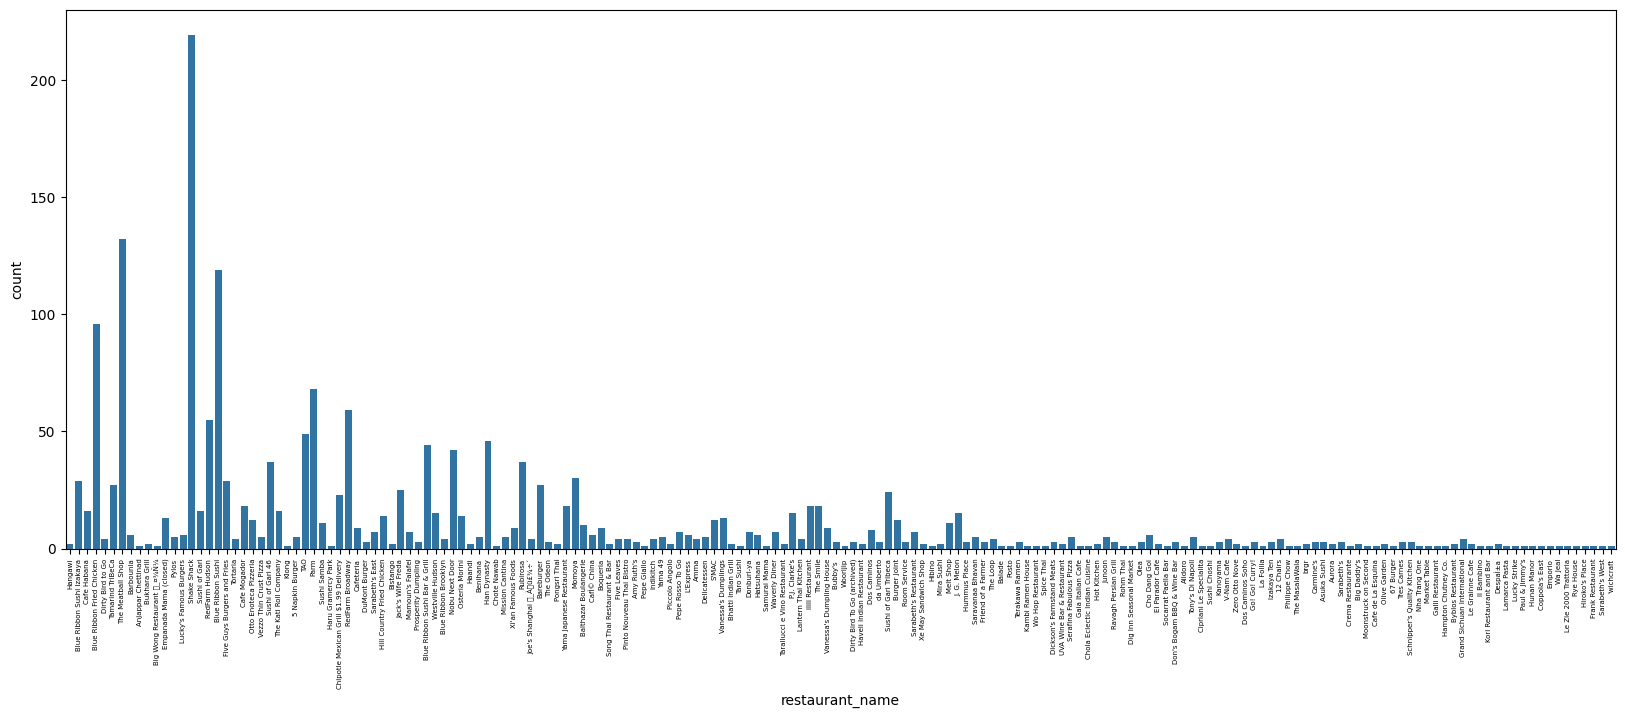

In [11]:
#countplot for finding the most demanding restaurants

plt.figure(figsize = (20,7))
plt.xticks (rotation = 90,fontsize = 5)
sns.countplot (data=data,x='restaurant_name')


#### Observations for restaurant_name column

- 'Shake Shack' is most demanding restaurant with maximum number of orders with approximately 220 orders.
- 'The Meatball Shop' has second highest number of orders with close to 130 orders.
- 'Blue Ribbon Sushi' is third highest number of orders with approxiamtely 120 orders

<AxesSubplot: xlabel='count', ylabel='cuisine_type'>

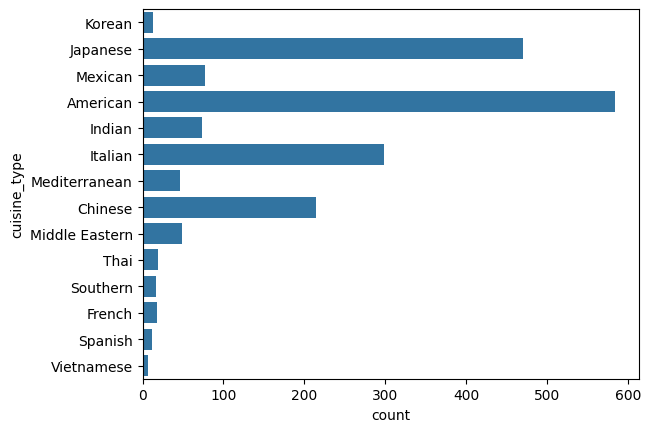

In [12]:
#countplot for finding most ordered cusinies by the customers
sns.countplot (data=data,y='cuisine_type')

#### Observations for cuisine_Type column

- Most ordered cuisines is American cuisine with highest number of orders of 584
- Second most ordered cuisines is Japanese with second highest number of orders of 470, which can also be made out by taking into consideration that the third most popular restuarant serves Sushi
- Third most ordered cuisines is Italian with third highest number of orders of 298

<AxesSubplot: xlabel='day_of_the_week', ylabel='count'>

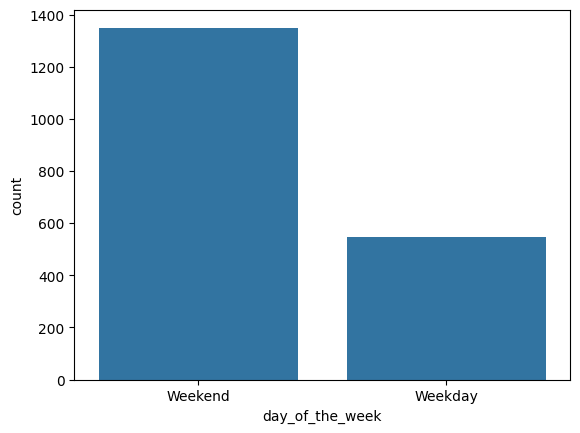

In [13]:
# countplot for finding the most busiest days of the week for food orders
sns.countplot (data = data,x='day_of_the_week')

#### Observations for day_of_the_week column

- There are significantly more orders placed on the weekend than on a weekday which means we will have to serve more customers on Weekends compared to weekdays

#### Observations for the order_id column

- Order_id is unique for each order, therefore plotting it would not really mean anything.

<AxesSubplot: xlabel='customer_id', ylabel='Count'>

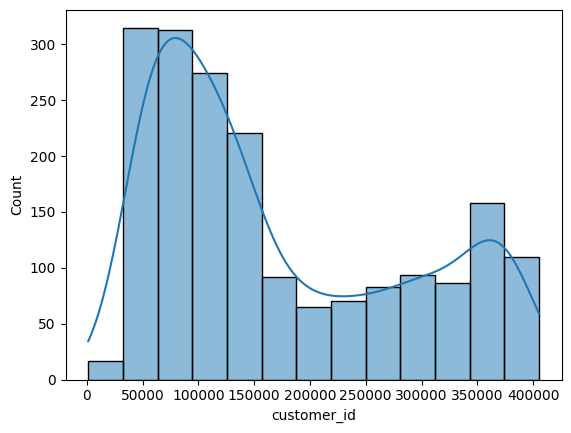

In [14]:
#histogram to find customers who have most orders placed
sns.histplot(data,x='customer_id',kde = True)

#### Observations for customer_id column

- Since the data is right-skewed, the median is towards suggesting that maximum orders are placed by customers whose id lies between Q1 and median.
- This will in turn help serve those customers better, and bring more customers onboard to use the application.

<AxesSubplot: xlabel='food_preparation_time', ylabel='Count'>

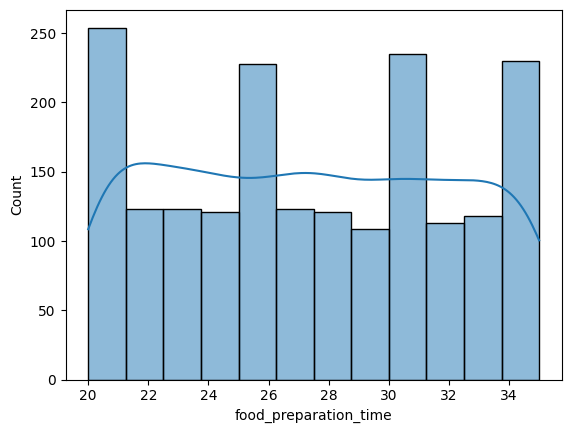

In [15]:
#histogram to find the distribution of food_preparation_time
sns.histplot(data,x='food_preparation_time',kde = True)

#### Observations for food_preparation_time column

- The median happens to middle of inter-quartile range and the whiskers seem of equal length, therefore the data is normally distrbuted.
- There seem to no outliers either as the difference between q1,median,q3 is evenly spread, suggesting that the mean is nearly equal to median

<AxesSubplot: xlabel='delivery_time', ylabel='Count'>

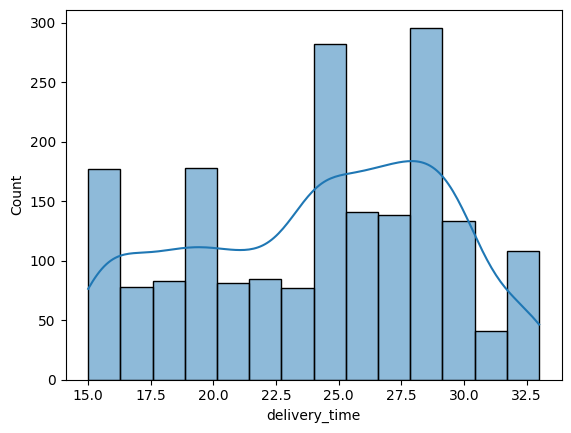

In [16]:
#histogram to find the distribution of delivery_time
sns.histplot(data,x="delivery_time",kde = True)

#### Observations for delivery_time column

- The median is slightly to the right suggesting the data is little left-skewed. Therefore, deliveries taking more time is more than deliveries taking less time. 
- However, deliveries taking more than 30 minutes are significantly less, suggesting that customers are likely to order from a little far but not too far.

In [17]:
#boxplot to find the distribution of cost_of_the_order
px.box(data,'cost_of_the_order')

#### Observations for cost_of_the_order column

- The data in this case is right-skewed as the distance between Q1 and median is less than distance between median and Q3, suggesting that there are most orders placed of a lesser price than orders placed of more price.
- Even though the skewness, the data contains no outliers, suggesting the average cost of order is equal to the median cost of order.

<AxesSubplot: xlabel='rating', ylabel='count'>

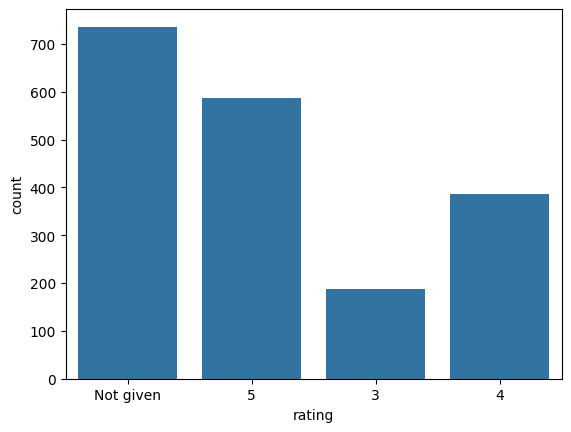

In [18]:
#countplot for rating column when not modified
sns.countplot(data,x='rating')

### Observations

 - There are lot of 'Not given' values values in the data can be treated as NULL values 
    Further the data can be grouped as per the restaurants and NULL values can be dealt with by taking mean of all the rating values of that group and
    assign to NULL values of that particular group itself. If after this operation null values persist, can go ahead with keeping them as zero.


In [19]:
# boxplot of rating column wherein the 'Not Given' values are modified
def replace_values_rating (df):

    df['rating'] = pd.to_numeric(df['rating'],errors = 'coerce')

    df['rating'] = df.groupby('restaurant_name')['rating'].transform(lambda x: x.fillna(x.mean()))

    df['rating'].fillna(0,inplace = True)

    return df

rating_data = replace_values_rating(data)
px.box(rating_data , x='rating')

#### Observations for rating column 

- As per the plot, the rating column has lesser data points of rating less than 4, that is left-skewed. Therefore, most of the restaurants listed have a good rating.
- There are also certain restaurants which have zero rating, these have been considered outliers, which could be considered for a possible delisting of the restaurant from the portal.
- Also there are restaurants which have 3 rating, which needs further analysis on how to deal with such restaurants.

### **Question 7**: Which are the top 5 restaurants in terms of the number of orders received? [1 mark]

In [20]:
# Write the code here
restuarants = data.groupby(['restaurant_name'])['order_id'].count().reset_index(name = 'count')
descending_restaurants = restuarants.sort_values(by ='count',ascending=False)
print (descending_restaurants.head())


               restaurant_name  count
136                Shake Shack    219
153          The Meatball Shop    132
21           Blue Ribbon Sushi    119
20   Blue Ribbon Fried Chicken     96
109                       Parm     68


#### Observations:

The top 5 restaurants in terms of number of orders received are: 

1. 'Shake Shack' with 219 orders
2. 'The Meatball Shop' with 132 orders
3. 'Blue Ribbon Sushi' with 119 orders
4. 'Blue Ribbon Fried Chicken' with 96 orders
5. 'Parm' with 68 orders


### **Question 8**: Which is the most popular cuisine on weekends? [1 mark]

In [21]:
# Write the code here
weekend_data = data[data['day_of_the_week'] == 'Weekend']
most_popular_cuisine = weekend_data.groupby(['cuisine_type'])['order_id'].count().reset_index(name = 'count')
print (most_popular_cuisine.head(1))

  cuisine_type  count
0     American    415


#### Observations:

The most popular cuisine on weekends is American with 415 orders only on weekends

### **Question 9**: What percentage of the orders cost more than 20 dollars? [2 marks]

In [22]:
# Write the code here
orders_more_than_20 = data[data['cost_of_the_order'] > 20.0].shape[0]
total_orders = data.shape[0]

print ("Percentage=",orders_more_than_20/total_orders * 100)

Percentage= 29.24130663856691


#### Observations:

Percentage of orders costing more than 20 dollars is 29.24130663856691%


### **Question 10**: What is the mean order delivery time? [1 mark]

In [23]:
# Write the code here

data['delivery_time'].mean()

24.161749209694417

#### Observations:

The mean order delivery time is 24.161749209694417 

### **Question 11:** The company has decided to give 20% discount vouchers to the top 3 most frequent customers. Find the IDs of these customers and the number of orders they placed. [1 mark]

In [24]:
# Write the code here

customers = data.groupby ('customer_id')['order_id'].count().reset_index (name = 'count')

top_3_customers=customers.sort_values (by = 'count', ascending=False)

print (top_3_customers.head(3))

     customer_id  count
116        52832     13
84         47440     10
333        83287      9


#### Observations:

The top 3 most frequent customers are - 

1. Customer_id = 52832 having 13 number of orders placed 
2. Customer_id = 47440 having 10 number of orders placed
3. Customer_id = 83287 having 9 number of orders placed

### Multivariate Analysis

### **Question 12**: Perform a multivariate analysis to explore relationships between the important variables in the dataset. (It is a good idea to explore relations between numerical variables as well as relations between numerical and categorical variables) [10 marks]


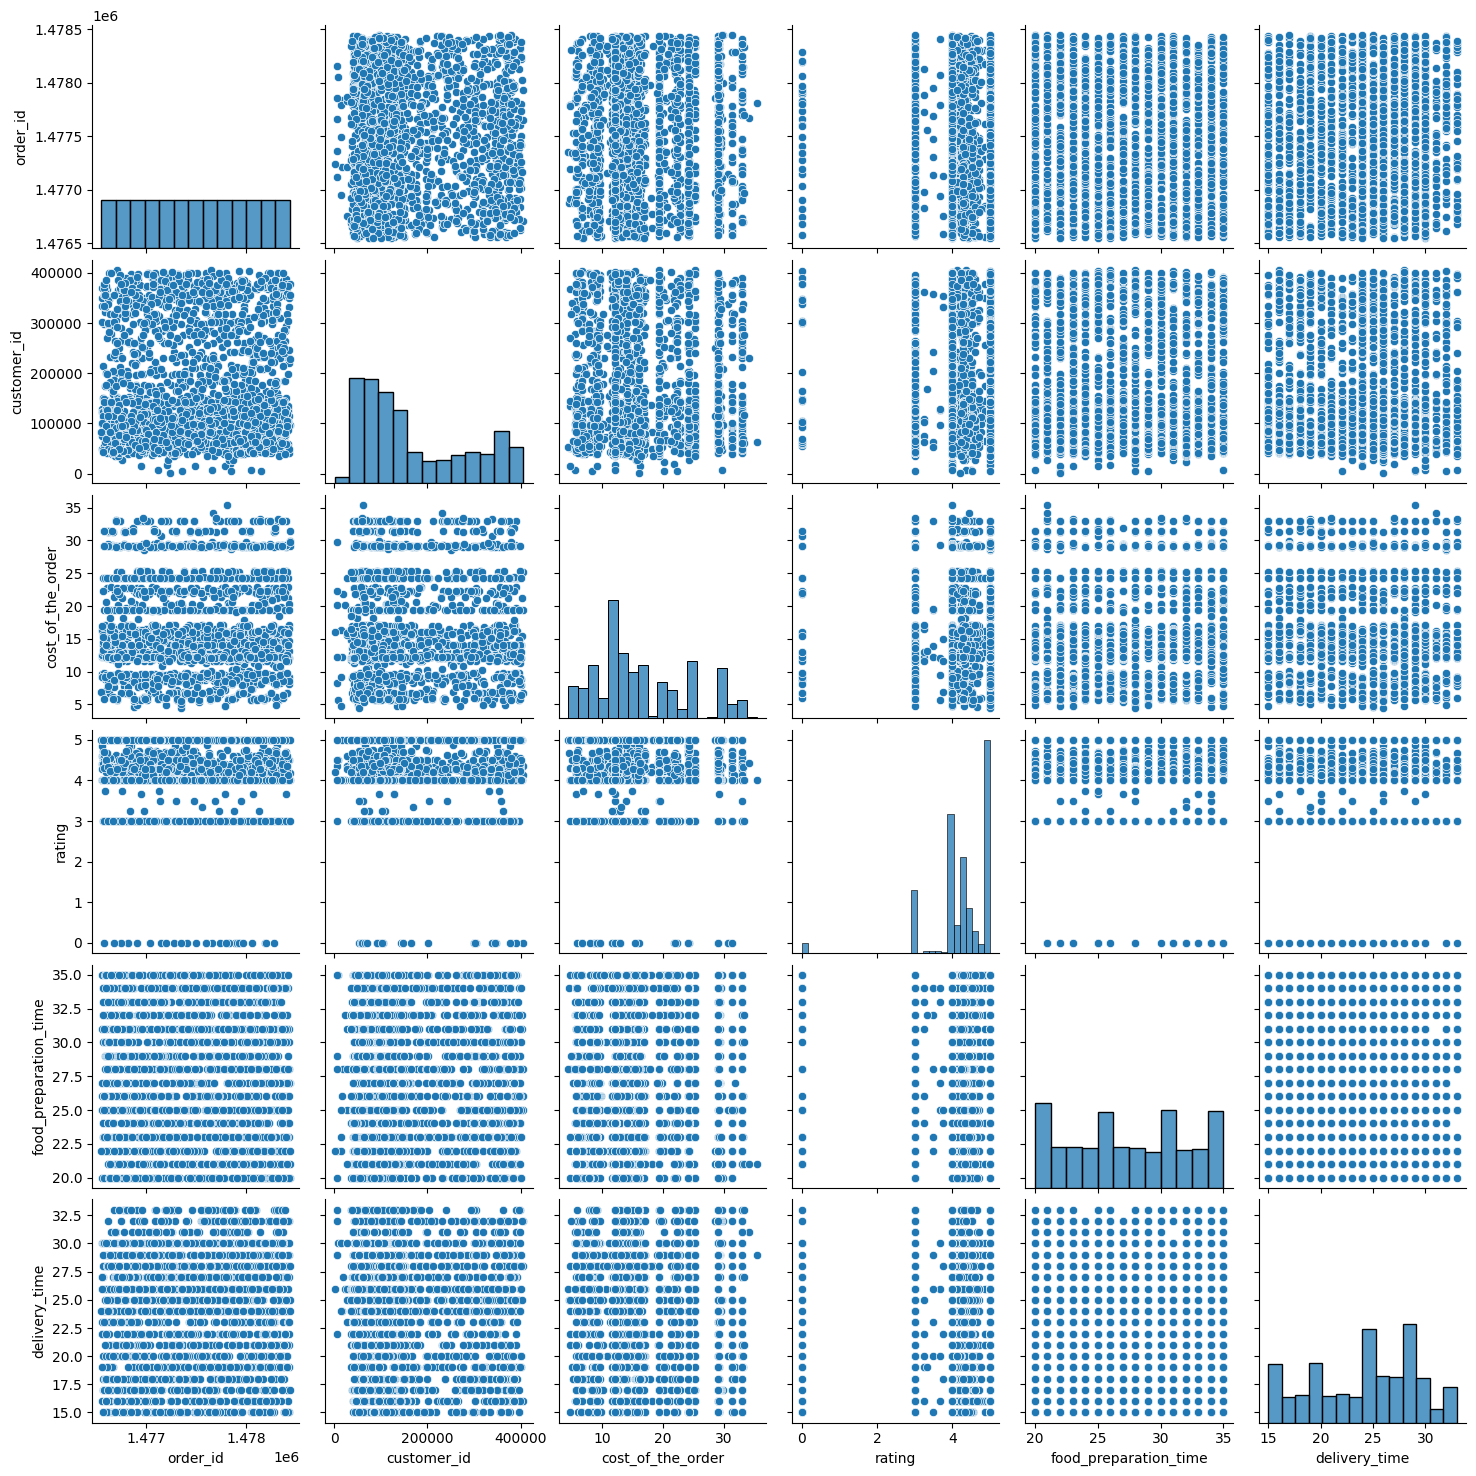

In [25]:
# pairplot to find relationships between data fro further analysis
sns.pairplot(data);

### Observations

- The data contains datapoints which have higher food_preparation_time and higher delivery_time, lower delivery_time higher food_preparation_time, lower food_preparation_time higher delivery_time, lower food_preparation_time lower delivery_time, therefore the data is pretty normally distributed. 
- The delivery_time is pretty normally distributed, when it comes to rating. Therefore low rating is less likely due to delivery_time.
- The food_preparation_time is less normally distributed, when it comes to rating. Therefore, certain instances when higher food_prepration_time, lesser the rating comparatively.

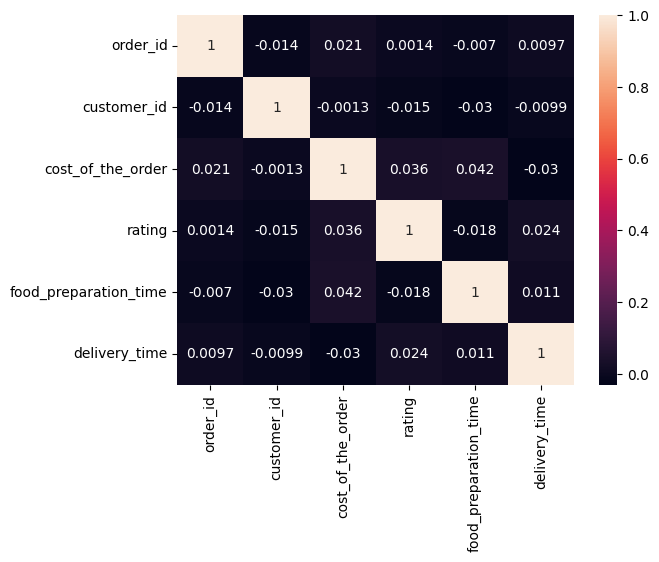

In [26]:
#heatmap to find correlation between the data
sns.heatmap(data = data[['order_id','customer_id','cost_of_the_order','rating','food_preparation_time','delivery_time']].corr(),annot= True,cbar = True);

### Observations

- There is small positive correlation between cost_of_the_order and rating, and cost_of_the_order and food_preparation_time
- There is small negative correlation between cost_of_the_order and delivery_time
- There is correlation between rating and delivery_time, which is more than that of rating and food_preparation_time, that is more food_preparation_time has caused to lesser rating
- There is positive correlation between food_preparation_time and delivery_time

In [27]:
#violinplot between cuisine_type and rating
px.violin(data,x='cuisine_type',y='customer_id')

### Observations

- Customers having id from 0 to 200k mostly order cuisine_type of ' Japanese','American','Indian','Italian','Mediterranean','Chinese','Middle Eastern','Southern','French'.
- Customers having id from 200k to 400k mostly order cuisine_type of 'Spanish'
- Cuisine_type 'Korean','Thai','Vietnamese' have customers from 0 to 600k, normally distributed.

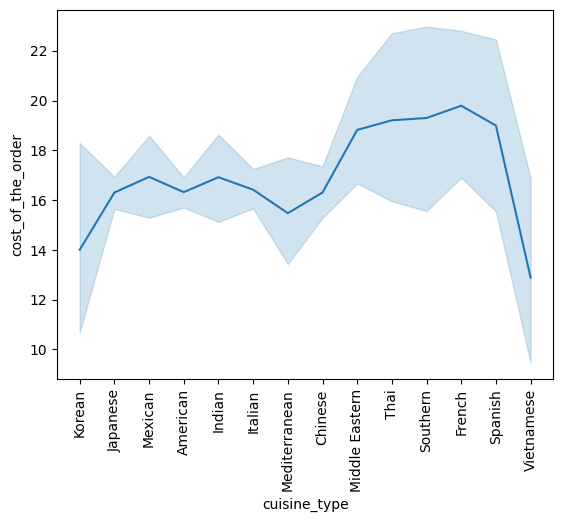

In [28]:
#lineplot between day_of_the_week and cuisine_type
plt.xticks (rotation = 90)
sns.lineplot(data,y='cost_of_the_order',x='cuisine_type');

### Observations

1. The cost of cuisine_types 'Japanese','Mexican','American','Indian','Italian','Mediterranean','Chinese' have cost_of_order nearly equal to the average cost_of_the_order, therefore not very expensive restaurants.
2. The cost of cuisine_types 'Middle Eastern','Thai','Southern','French','Spanish' have cost_of_the_order above the average cost_of_the_order, therefore are expensive restaurants.
3. The cost of cuisine_types 'Korean','Vietnamese' have cost_of_the_order above the average cost_of_the_order, therefore are inexpensive restaurants.
- Therefore it can considered that customers prefer ordering food of cuisine_types that have mean cost_of_the_order, rather than expensive and inexpensive restaurants.

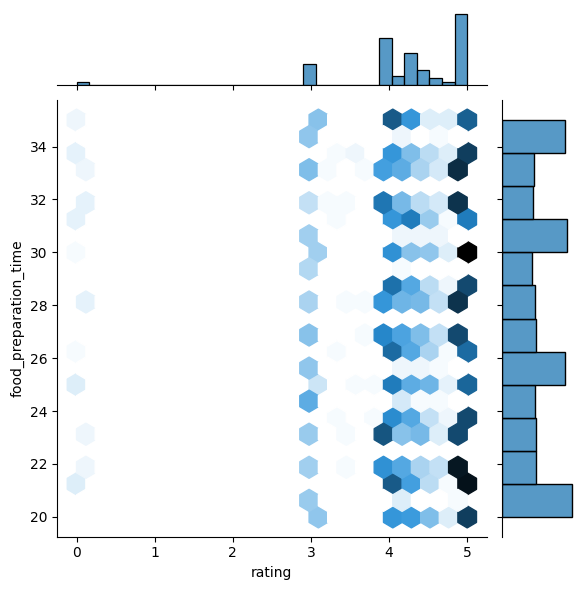

In [29]:
#jointplot between rating and food_preparation_time
sns.jointplot(data=data,x='rating',y='food_preparation_time',kind = "hex")

### Observations

- We can make out that the zero rating is slightly more dense when the food preparation time is more. While the for zero rating is slightly less dense when the food preparation time is less.
- Also, rating in the range from 4-5 is more dense as can be made out from the histogram, infering most of the restaurants are doing good business. 

c:\Users\lenovo\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\categorical.py:3399: UserWarning:

38.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.

c:\Users\lenovo\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\categorical.py:3399: UserWarning:

55.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.

c:\Users\lenovo\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\categorical.py:3399: UserWarning:

23.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.

c:\Users\lenovo\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\categorical.py:3399: UserWarning:

13.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.



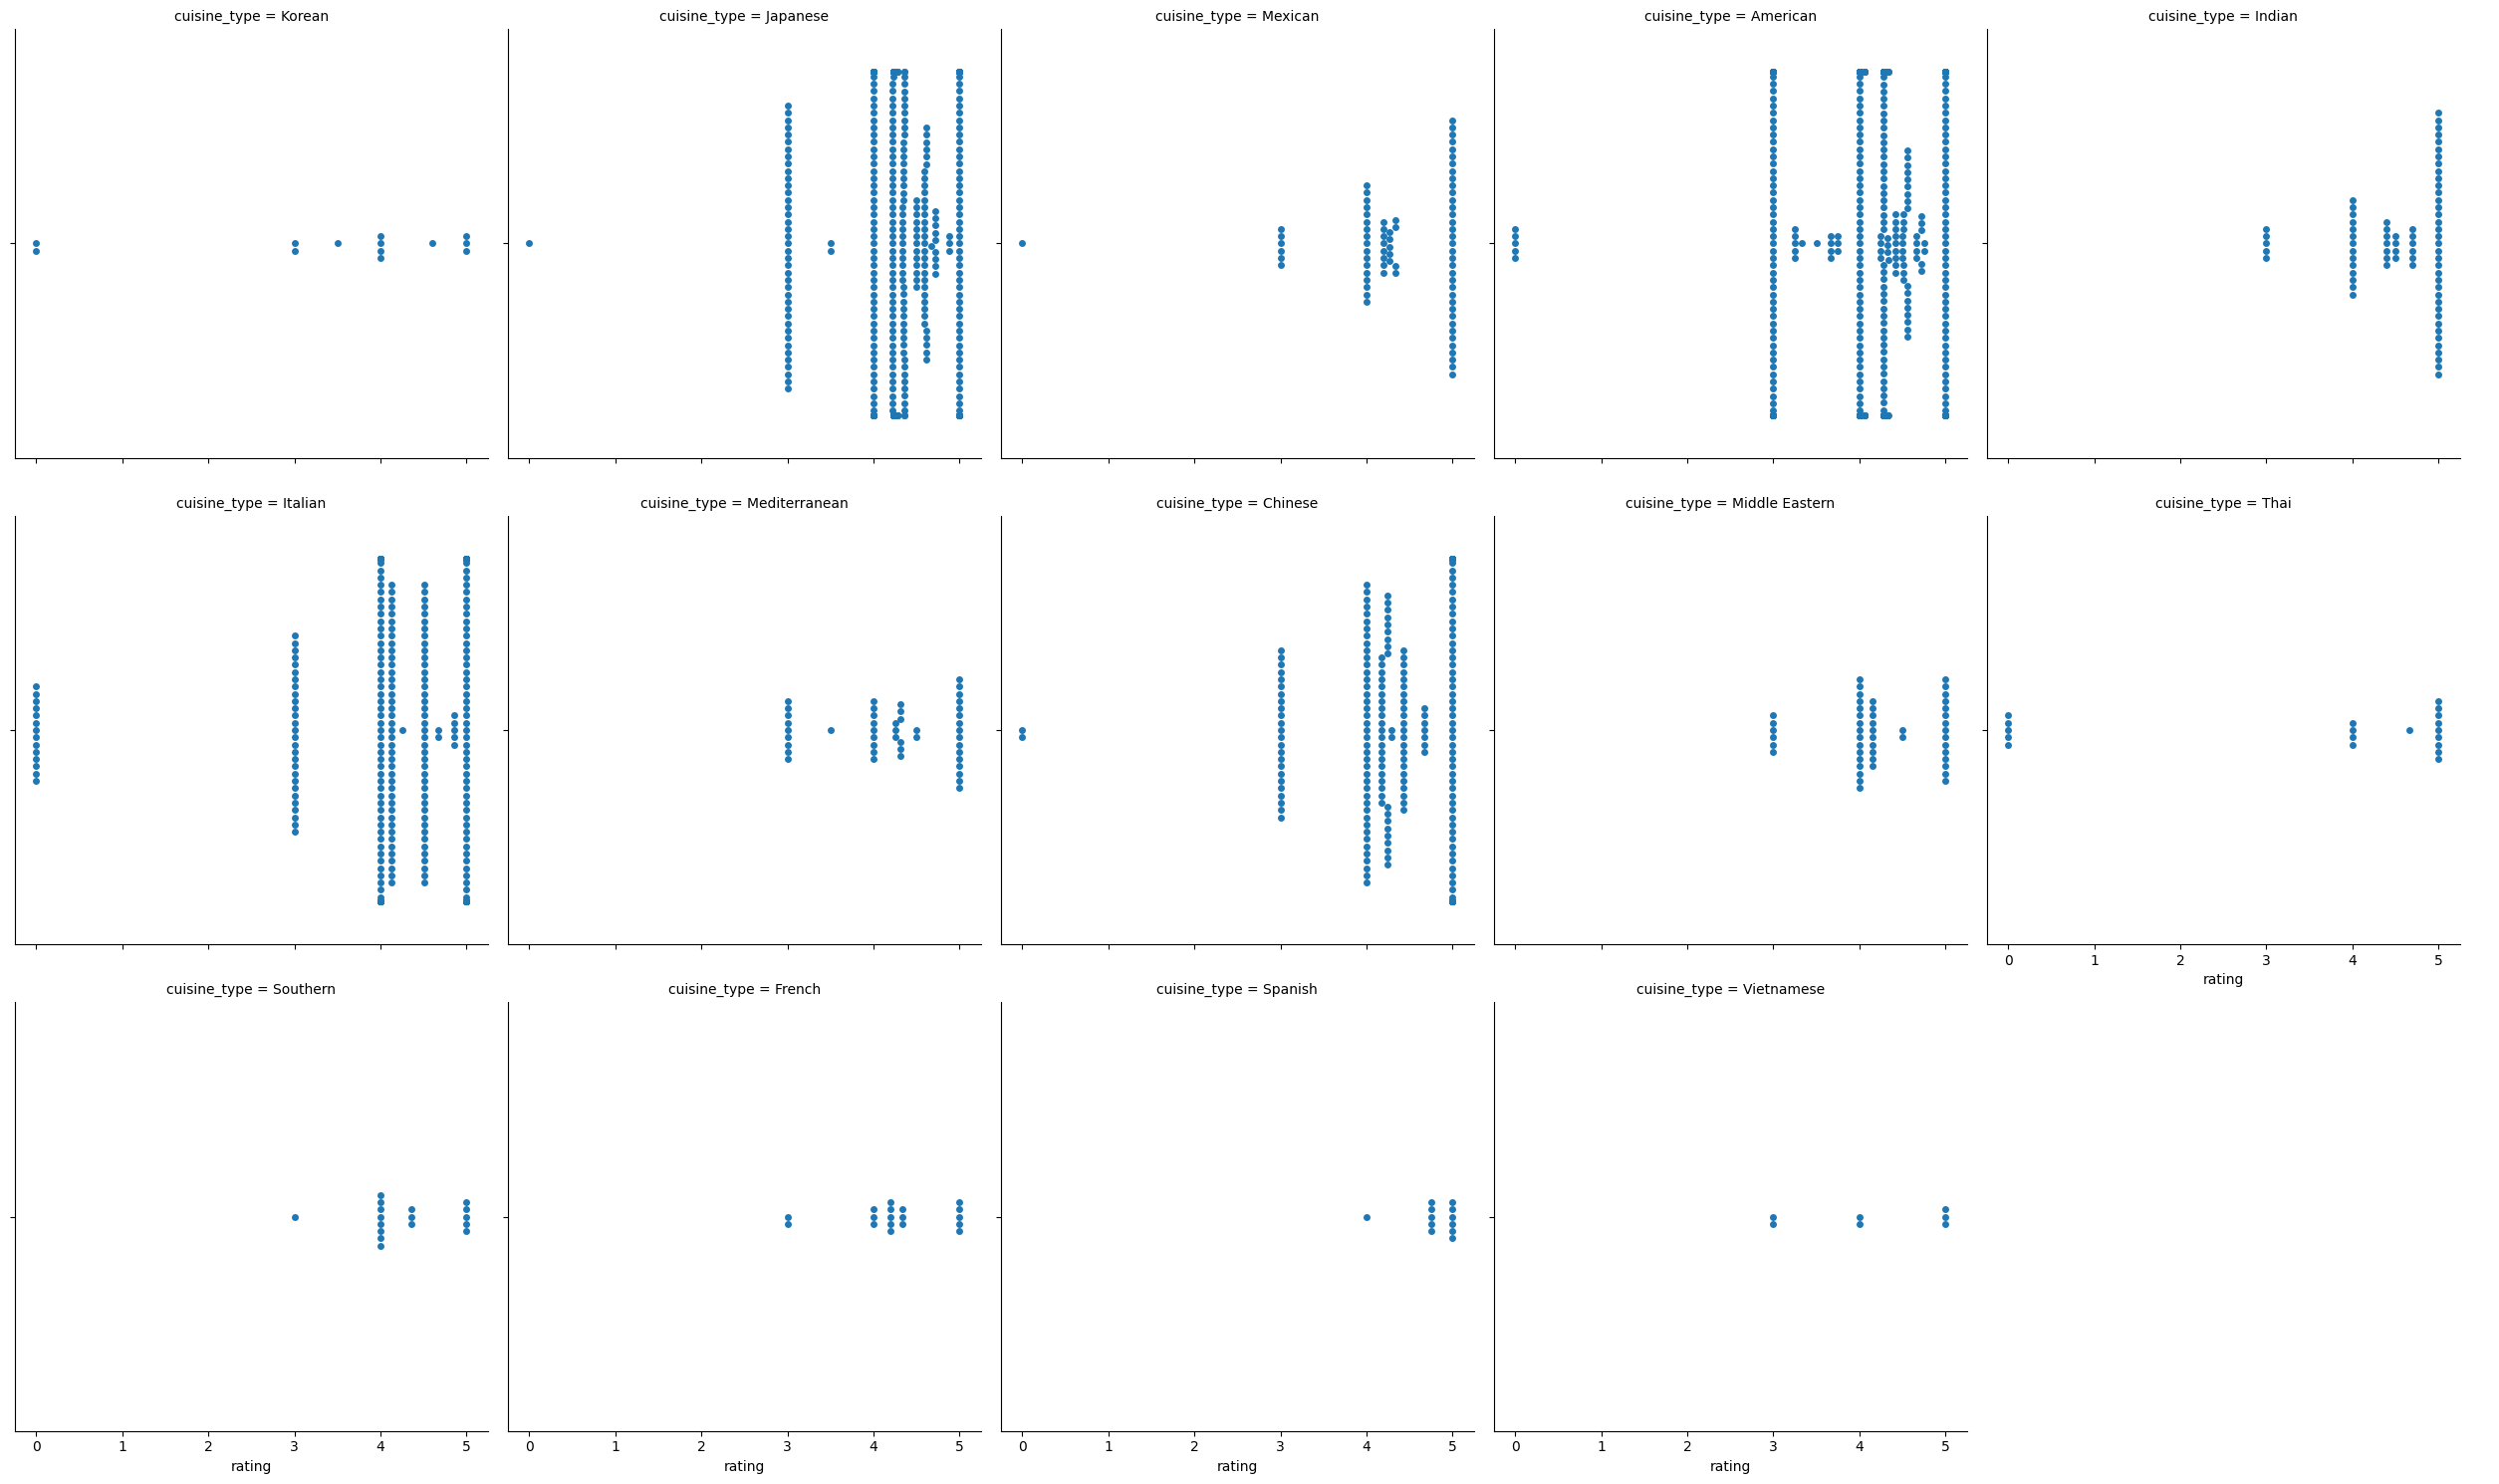

In [30]:
#Biforcation of rating according to every cuisine type

sns.catplot(col = 'cuisine_type',
            x = 'rating',
            data=data,
            col_wrap = 5,
            kind = 'swarm',)

### Observations

- Most liked cuisine_type is 'Indian' and 'Mexican' since it has very less low rating, and mostly 5 rating.
- A lot of 'Italian' restaurants have zero rating, which needs to be dealt with properly.
- Restaurants of cuisine_type 'American','Chinese','Japanese' have significant amount of low rating, therefore need to be properly handled such as giving warning to such restaurants.

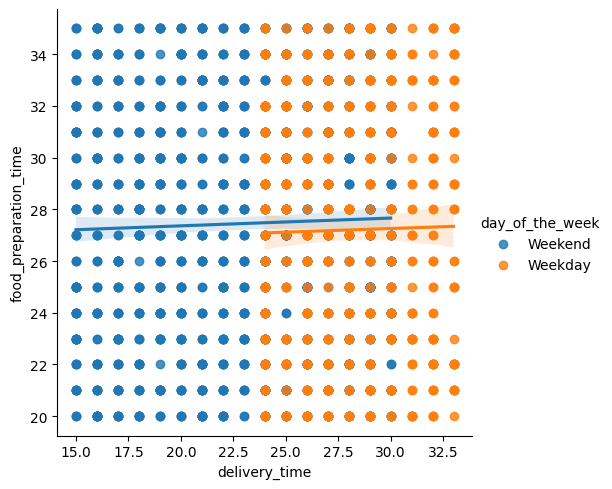

In [ ]:
#creating lmplot between food_prepartion_time and delivery_time as per day_of_the week
sns.lmplot(data=data,x='delivery_time',y='food_preparation_time',hue='day_of_the_week');

### Observations

- Delivery_time is more on weekdays as compared to weekends, therefore require more delivery agents to work on weekdays for better customer experience
- Food_preparation_time is more evenly spread irrespective of any day_of_the_week

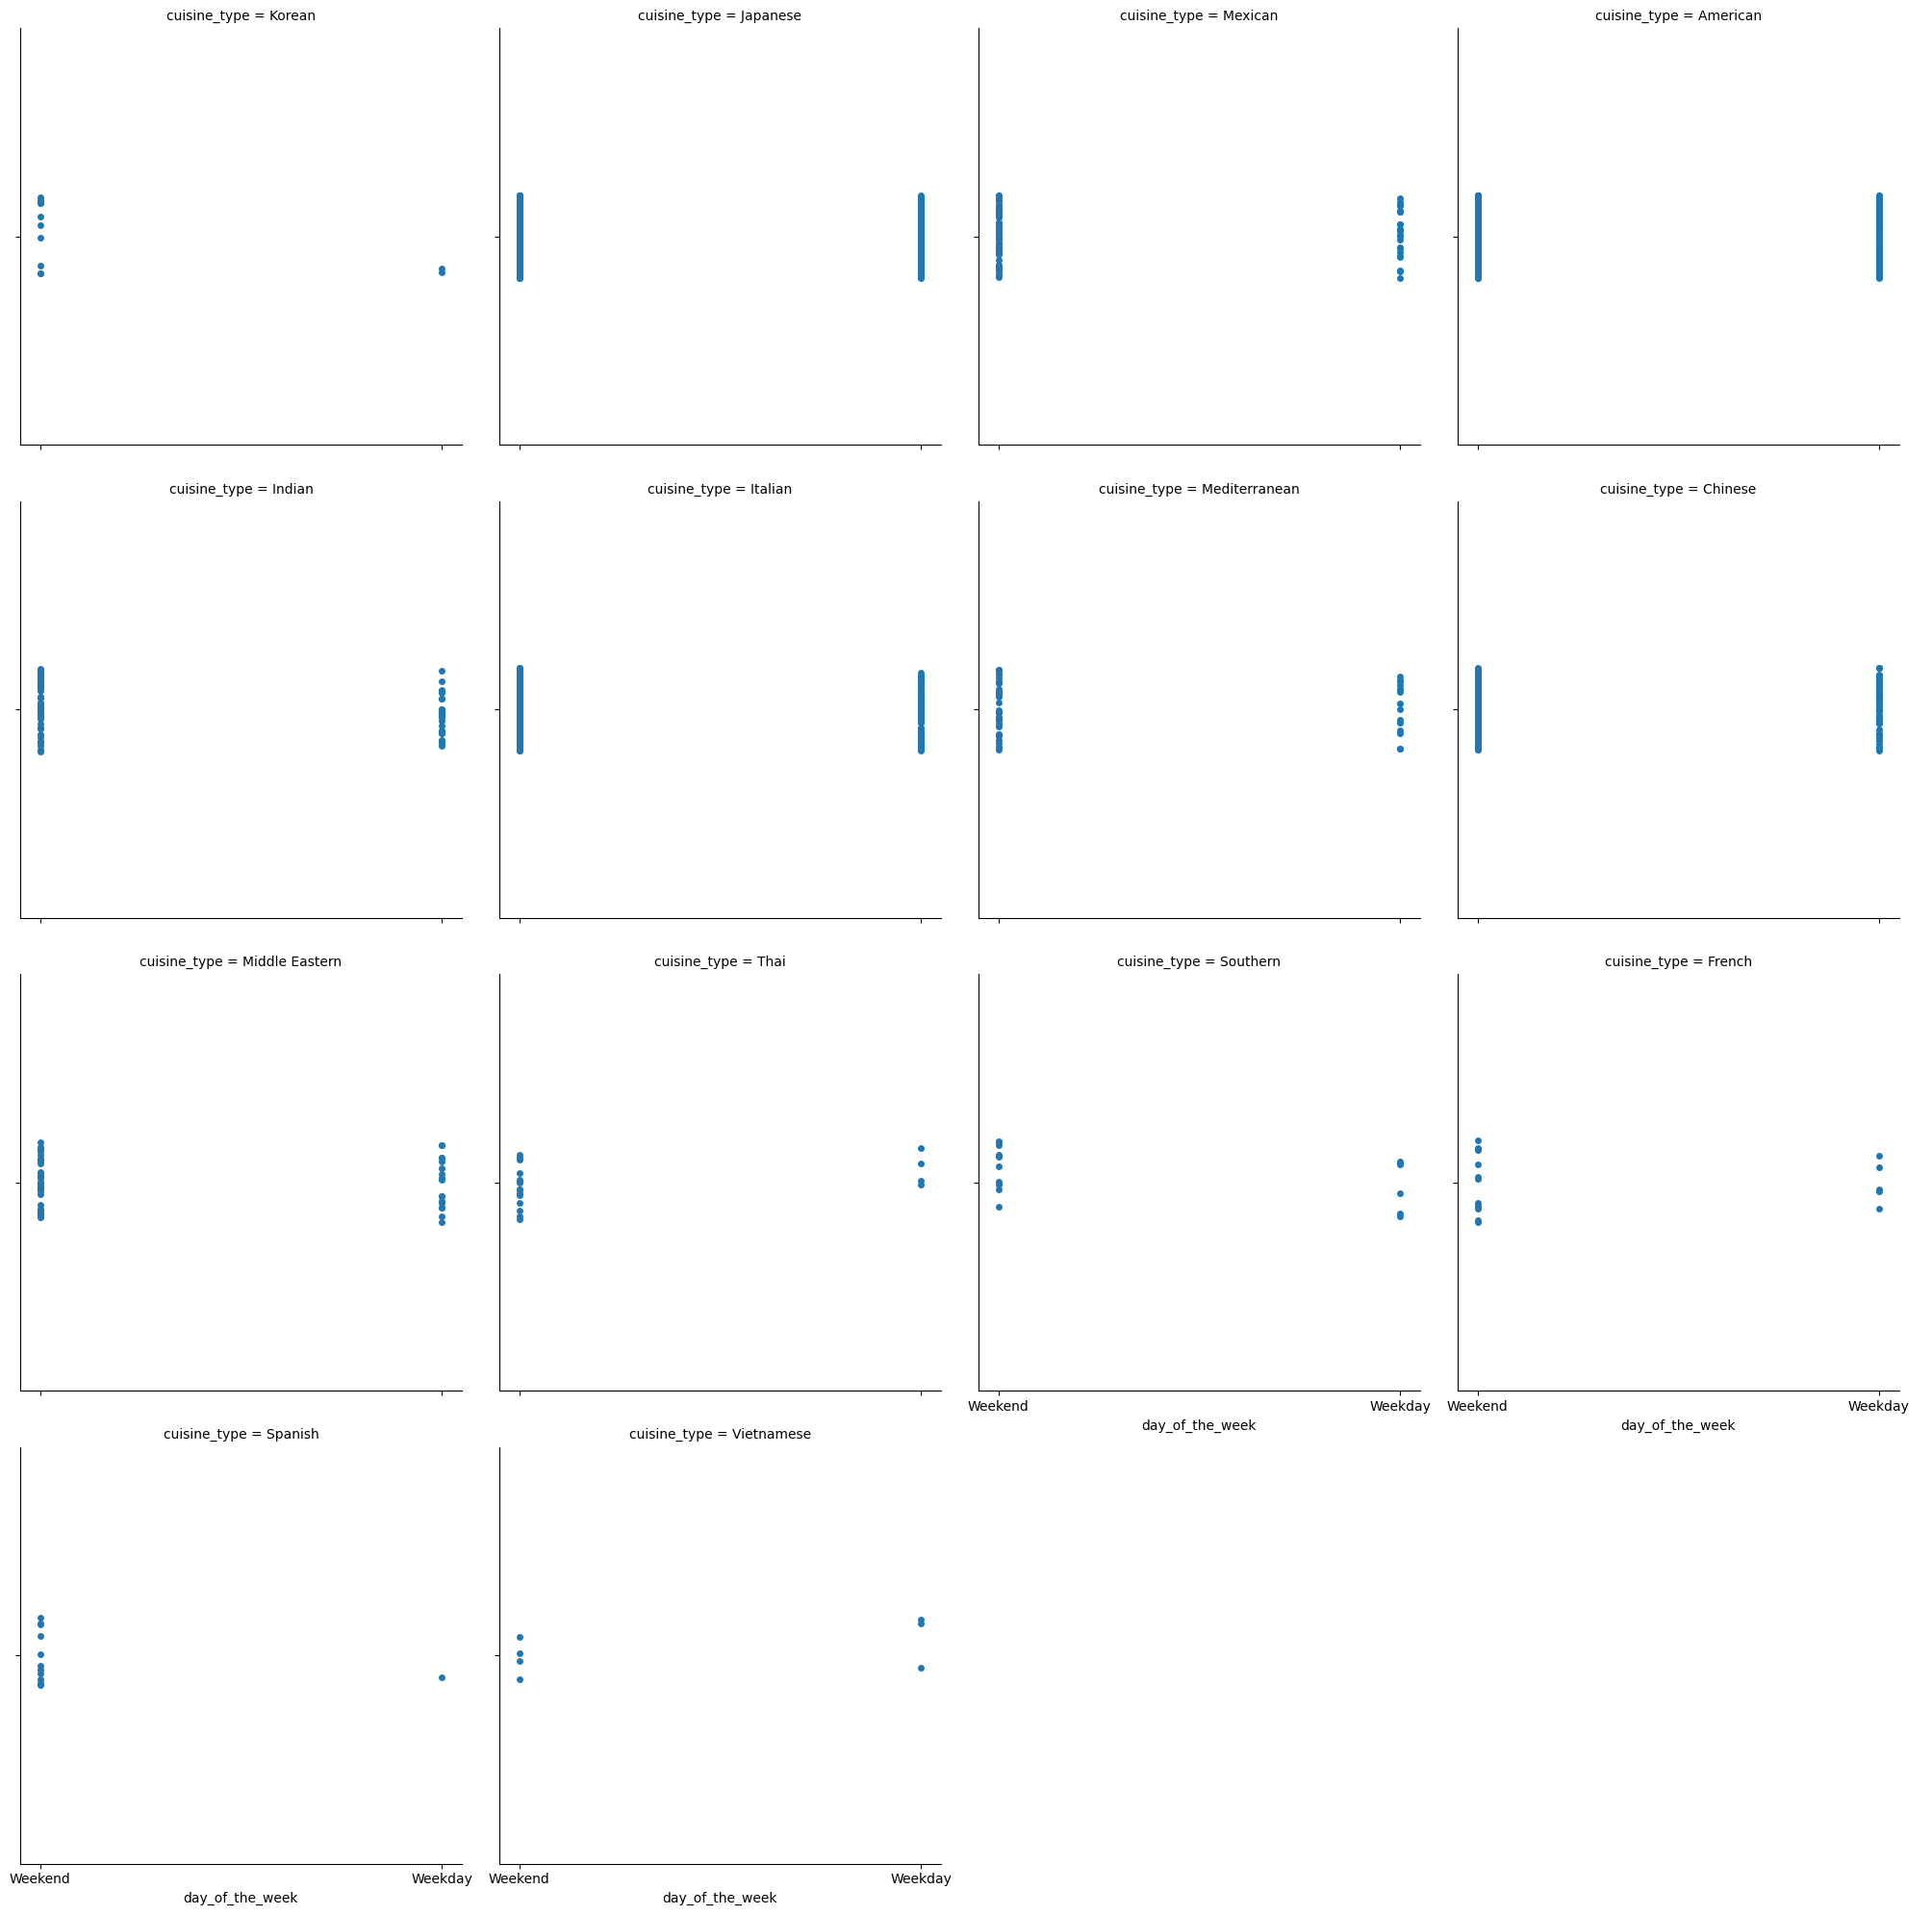

In [43]:
# biforcation between day_of_the_week as per cuisine_type
sns.catplot(
    data= data,
    col= 'cuisine_type',
    x='day_of_the_week',
    kind = 'strip',
    col_wrap=4
)

### Observations

- Cuisine-types 'American','Japanese','Chinese','Italian'have depend both on weekdays and weekends.
- Cuisine-types 'Korean','Mexican','Indian','Mediterrean','Southern','Thai','Spanish' have more demand on weekends as compared to weekdays.
- This data would be helpful in recommending restuarants to customers based on cuisine_type and day_of_the_week

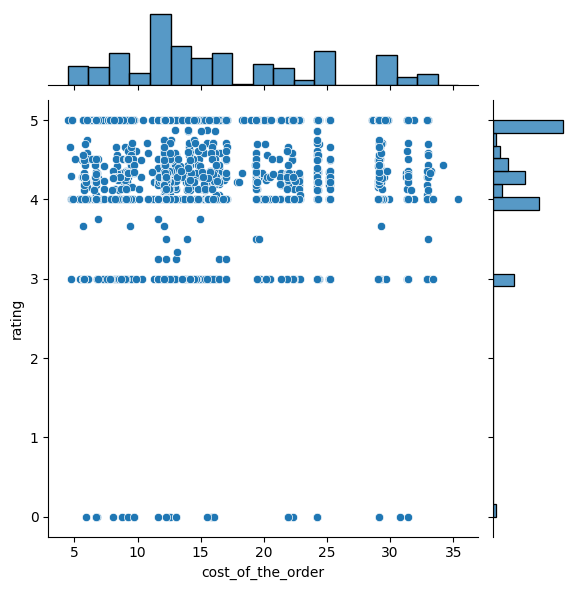

In [ ]:
#stacked barplot to find the restaurants more popular as per rating
sns.jointplot(data=data,x='cost_of_the_order',y='rating');

### Observations

- There are restaurants which have less cost_of_the_order and still have less rating.
- There are restaurants which have more cost_of_the_order and have less rating.
- Therefore, cost_of_the_order has no correlation with the rating

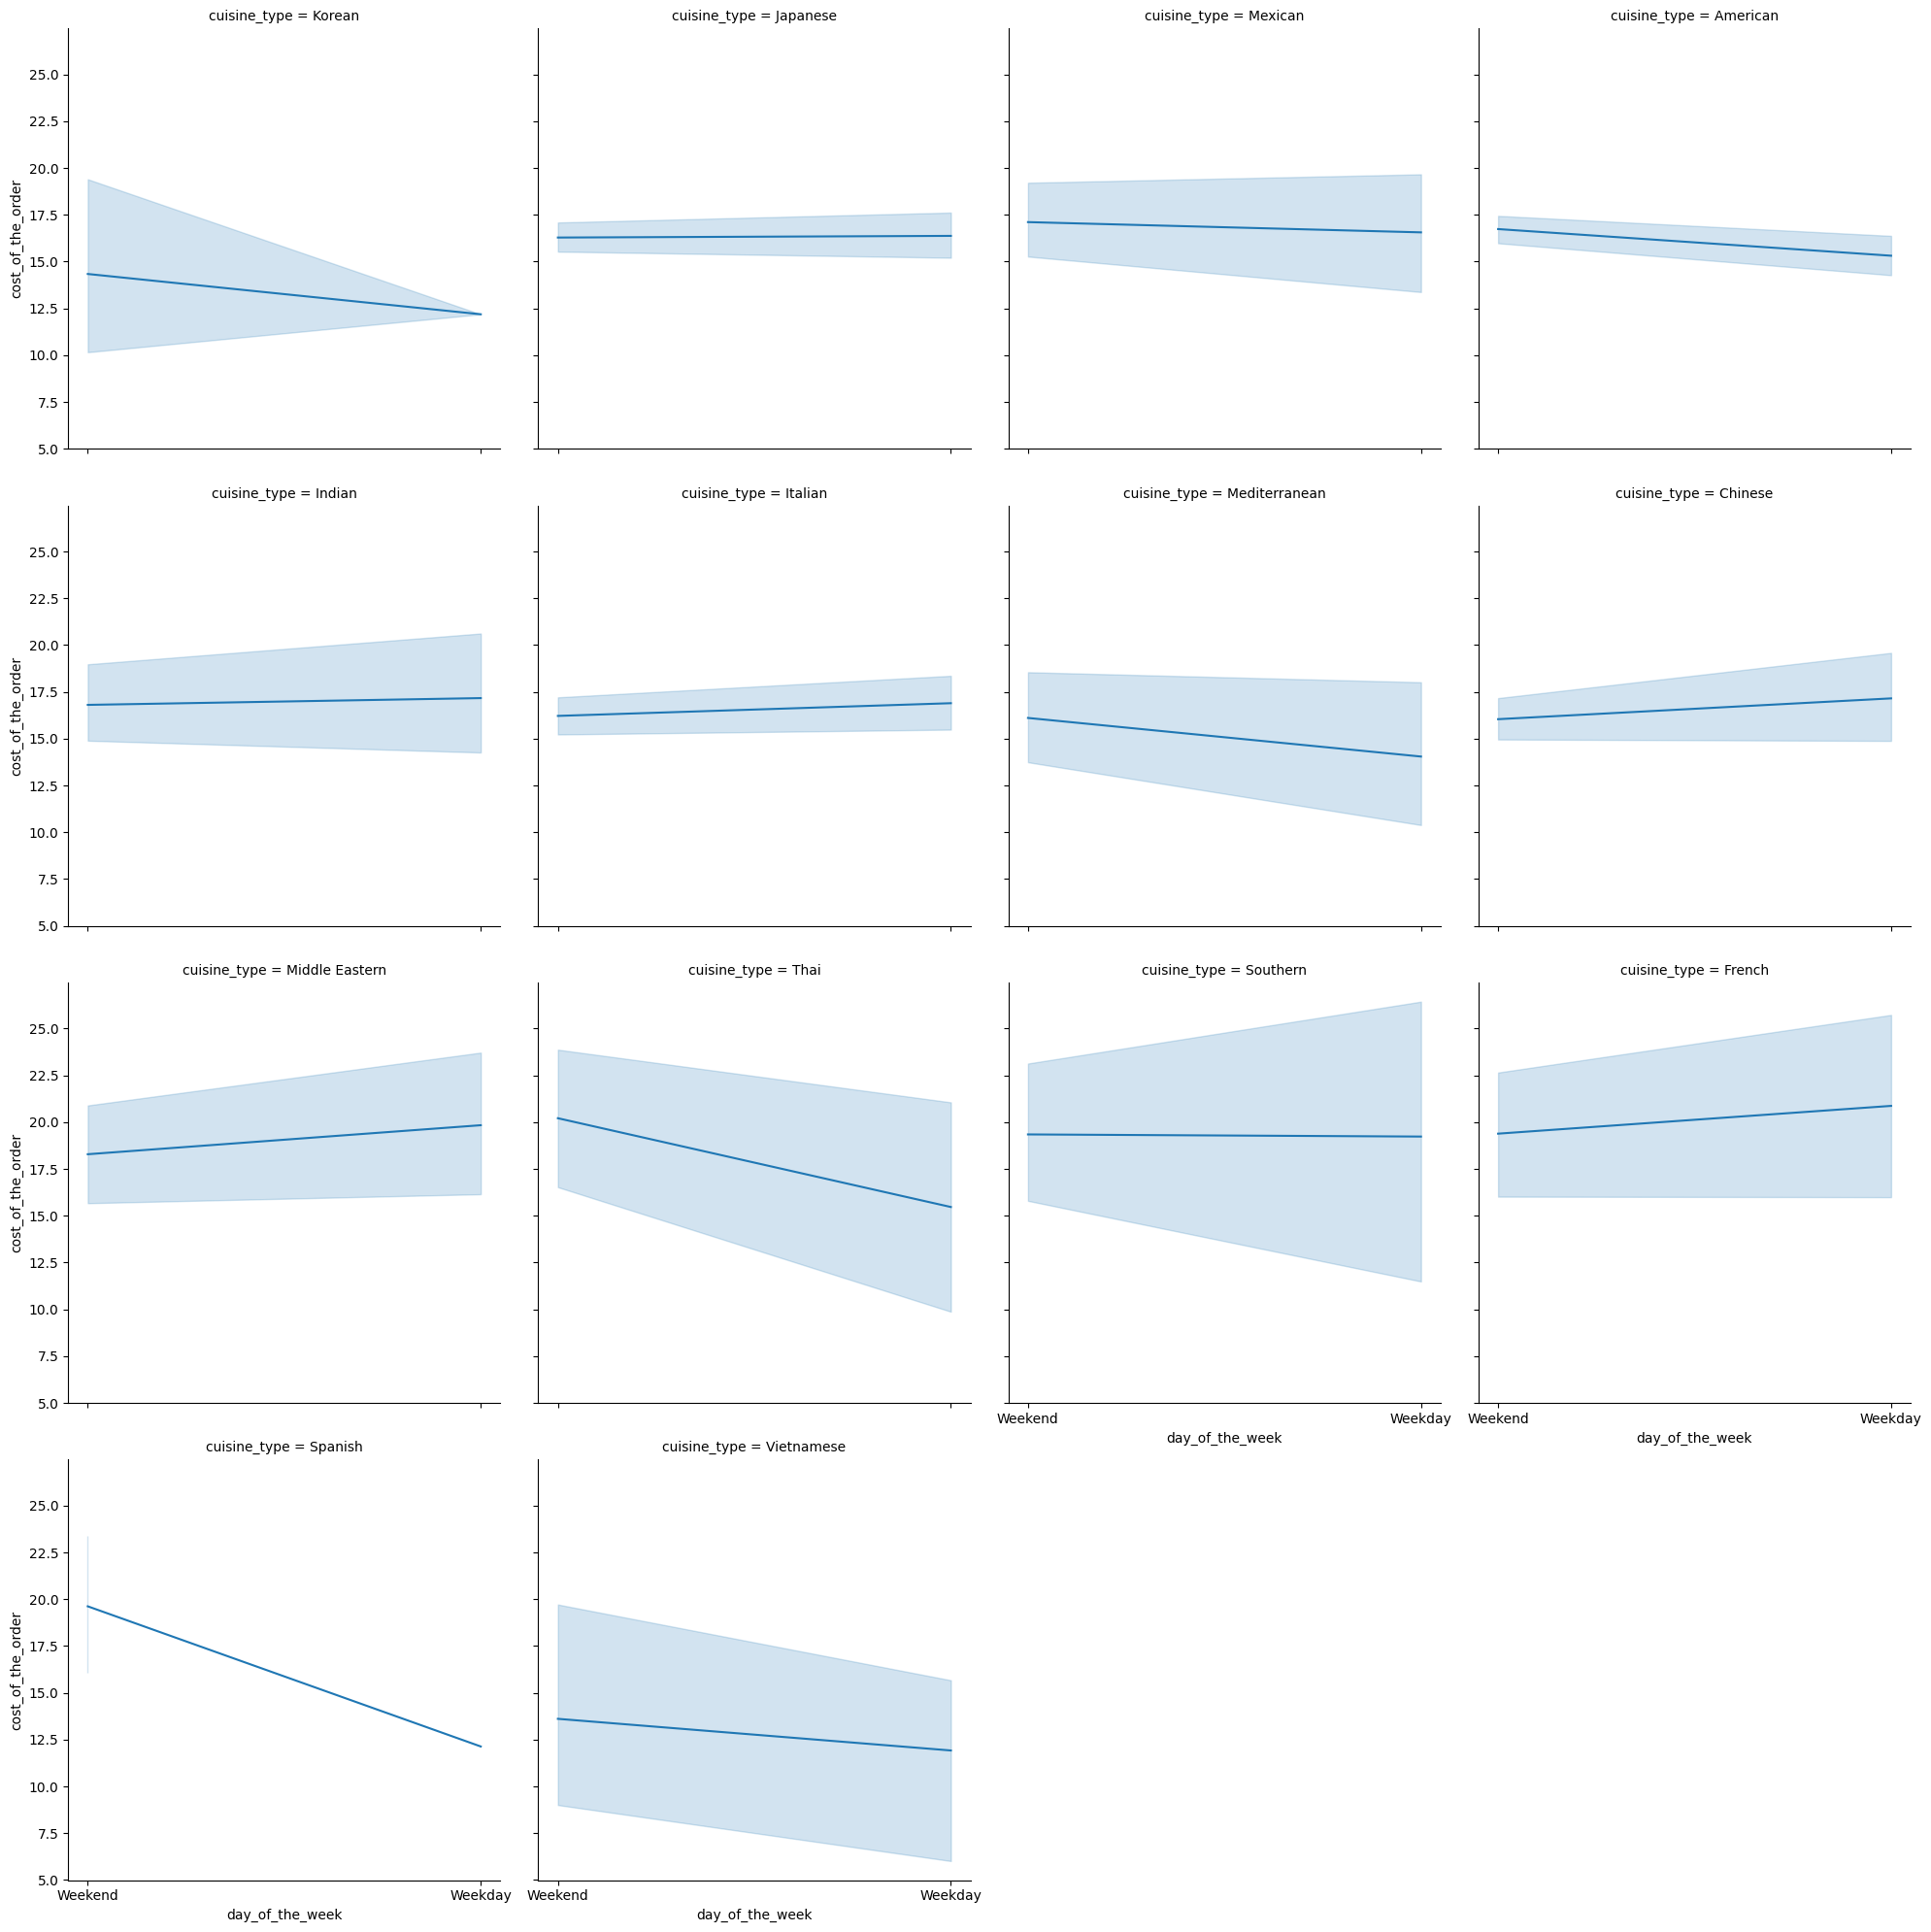

In [73]:
#plot of cost_of_order and cuisine_type with respect to the delivery_time
sns.relplot(data=data,x='day_of_the_week',y='cost_of_the_order',col='cuisine_type',kind = 'line',col_wrap=4)

### Observations

- Certain restaurants of cuisine_type like 'Korean','Mediterrean','Thai','Spanish','Vietnamese' have higher of cost of orders on weekends.
- Certain restaurants of cuisine_types 'French','Middle-Eastern','Chinese','Indian' have higher cost_of_the_order on weekdays.
- Rest of the cuisine_types are pretty equal orders irrespective of day_of_the_week.

### **Question 13:** The company wants to provide a promotional offer in the advertisement of the restaurants. The condition to get the offer is that the restaurants must have a rating count of more than 50 and the average rating should be greater than 4. Find the restaurants fulfilling the criteria to get the promotional offer. [3 marks]

In [159]:
# Write the code here
restaurants_rating_count = data.groupby ('restaurant_name')['rating'].count().reset_index(name = 'count')
restuarants_rating_avg = data.groupby('restaurant_name')['rating'].mean().reset_index(name = 'avg')

filtered_restaurants_count = restaurants_rating_count[restaurants_rating_count['count'] > 50] 
filtered_restaurants_avg = restuarants_rating_avg[restuarants_rating_avg['avg'] > 4]

restaurants_data = pd.merge (filtered_restaurants_count,filtered_restaurants_avg,on = 'restaurant_name',how = 'inner')
print (restaurants_data)


             restaurant_name  count       avg
0  Blue Ribbon Fried Chicken     96  4.328125
1          Blue Ribbon Sushi    119  4.219178
2                       Parm     68  4.128205
3           RedFarm Broadway     59  4.243902
4             RedFarm Hudson     55  4.176471
5                Shake Shack    219  4.278195
6          The Meatball Shop    132  4.511905


#### Observations:

1. Restaurant 'Blue Ribbon Fried Chicken' has rating count of 64 and average rating of is 4.32
2. Restaurant 'Blue Ribbon Sushi' has rating count of 73 and average rating of 4.21
3. Restaurant 'Shake Shack' has rating count of 133 and average rating of 4.27
4. Restaurant 'The Meatball Shop' has rating count of 84 and average rating of 4.51


### **Question 14:** The company charges the restaurant 25% on the orders having cost greater than 20 dollars and 15% on the orders having cost greater than 5 dollars. Find the net revenue generated by the company across all orders. [3 marks]

In [160]:
# Write the code here
def price_change (price):
    if price > 20:
        return 0.4 * price
    elif price > 5:
        return  0.15 * price
    else:
        return 0

data['foodhub_revenue_per_order'] = data['cost_of_the_order'].apply (price_change)

print (data['cost_of_the_order'].sum())

print (data['foodhub_revenue_per_order'].sum())

print (data['cost_of_the_order'].sum() - data['foodhub_revenue_per_order'].sum())

31314.82
8379.5395
22935.2805


#### Observations:

 - The FoodHub company charges a total of 31314.82 dollars for all orders taken by customers. 
 - The net revenue generated by the company is 8379.53 dollars after paying back 22935.28 dollars to the respective restaurants.


### **Question 15:** The company wants to analyze the total time required to deliver the food. What percentage of orders take more than 60 minutes to get delivered from the time the order is placed? (The food has to be prepared and then delivered.) [2 marks]

In [161]:
# Write the code here

data['total_time'] = data['delivery_time'] + data['food_preparation_time']
total_orders = data.shape[0]
total_orders_more_than_60 = data[data['total_time'] > 60].shape[0]

print (total_orders)
print (total_orders_more_than_60)
print (total_orders_more_than_60/total_orders *100)

1898
200
10.537407797681771


#### Observations:

The total number of orders placed are 1898 and the number of orders that took more than 60 mins to have it delivered since the time order was placed is 200. Therefore, the percentage of orders taking more than 60 minutes to get delivered from the time the order is placed is 10.53%

### **Question 16:** The company wants to analyze the delivery time of the orders on weekdays and weekends. How does the mean delivery time vary during weekdays and weekends? [2 marks]

In [162]:
# Write the code here

delivery_weekday_data = data[data['day_of_the_week'] == 'Weekday'][['delivery_time']]
delivery_weekend_data = data[data['day_of_the_week'] == 'Weekend'][['delivery_time']]

print ("7 point summary for delivery_time on Weekdays")
print (delivery_weekday_data.describe())
print ("..............................................................")
print ("7 point summary for delivery_time on Weekends")
print (delivery_weekend_data.describe())


7 point summary for delivery_time on Weekdays
       delivery_time
count     547.000000
mean       28.340037
std         2.891428
min        24.000000
25%        26.000000
50%        28.000000
75%        31.000000
max        33.000000
..............................................................
7 point summary for delivery_time on Weekends
       delivery_time
count    1351.000000
mean       22.470022
std         4.628938
min        15.000000
25%        18.500000
50%        22.000000
75%        27.000000
max        30.000000


#### Observations:

1. Number of deliveries is more on weekends than on weekdays, which means more orders are placed on weekends than on weekdays.
2. Mean delivery time on weekends is 22.47 minutes while those on weekdays is 28.34 on weekdays, which means it usually takes more time to deliver on weekdays than on weekends.
3. The minimum value, first quartile, median, third quartile and maximum value are pretty evenly spaced suggesting there are no outliers.
4. The mean is almost equivalent to the median, suggesting the delivery time is pretty normally distributed.
5. Standard Deviation is pretty low for both weekday and weekend deliveries, therefore the data is close to the mean

### Conclusion and Recommendations

### **Question 17:** What are your conclusions from the analysis? What recommendations would you like to share to help improve the business? (You can use cuisine type and feedback ratings to drive your business recommendations.) [6 marks]

### Conclusions:

1. There are restaurants have 0 rating and certain restaurants having high rating as well.
2. Restaurants of certain cuisine_types have more orders of weekends while certain have more weekdays
3. There are certain restaurants which have no so good rating due long foo_preparation_time.
4. We have categorized cuisine_type based on customer_ids using violin_plots
5. More delivery_time has led to less rating in certain instances.
6. Weekday deliveries are taking more time as compared to weekend deliveries.
7. There are more orders placed on weekends than on weekdays while the cost_of_the_order for certain cuisine_types is constant for any day_of_the_week.

### Recommendations:

1. Restaurants with zero rating should be considered for delisting to bring more people to order better food, thus having better experience and restaurants of high rating should be recommended to the users for better experience.
2. More revenue can be generated, if we recommend restaurants of cuisine_types which are popular as per day_of_the_week on which the user is ordering the food. 
3. We might need to inform the restaurants to prepare food quickly otherwise it will continue getting bad rating from the users.
4. We can recommend specific cuisine_types to specific customer_ids based on the past orders for better experience.
5. We might need to add a feature that this order will take more time and recommend options of same cuisine_type which will take less time.
6. Deploying more delivery agent on weekdays would boost customer satisfaction and probably generate more revenue.
7. Revenue can be enhanced by keeping the prices of food a little on the higher side for weekends rather than weekdays, as customers order more on weekends rather than weekdays.